In [2]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# for chapter 3.2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt


# for chapter 4
import statsmodels.api as sm


In [18]:
import pandas as pd
df = pd.read_stata("Datasets//hsbdemo.dta")
display(data.head())

,id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
0,45.000000,female,low,public,vocation,34.000000,35.000000,41.000000,29.000000,26.000000,not enrolled,0.000000,1
1,108.000000,male,middle,public,general,34.000000,33.000000,41.000000,36.000000,36.000000,not enrolled,0.000000,1
2,15.000000,male,high,public,vocation,39.000000,39.000000,44.000000,26.000000,42.000000,not enrolled,0.000000,1
3,67.000000,male,low,public,vocation,37.000000,37.000000,42.000000,33.000000,32.000000,not enrolled,0.000000,1
4,153.000000,male,middle,public,vocation,39.000000,31.000000,40.000000,39.000000,51.000000,not enrolled,0.000000,1


In [19]:
list(df.columns)
df = pd.get_dummies(df, columns=['female', 'ses', 'schtyp', 'honors'], drop_first=True)
display(df)

,id,prog,read,write,math,science,socst,awards,cid,female_female,ses_middle,ses_high,schtyp_private,honors_enrolled
0,45.000000,vocation,34.000000,35.000000,41.000000,29.000000,26.000000,0.000000,1,1,0,0,0,0
1,108.000000,general,34.000000,33.000000,41.000000,36.000000,36.000000,0.000000,1,0,1,0,0,0
2,15.000000,vocation,39.000000,39.000000,44.000000,26.000000,42.000000,0.000000,1,0,0,1,0,0
3,67.000000,vocation,37.000000,37.000000,42.000000,33.000000,32.000000,0.000000,1,0,0,0,0,0
4,153.000000,vocation,39.000000,31.000000,40.000000,39.000000,51.000000,0.000000,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100.000000,academic,63.000000,65.000000,71.000000,69.000000,71.000000,5.000000,20,1,0,1,0,1
196,143.000000,vocation,63.000000,63.000000,75.000000,72.000000,66.000000,4.000000,20,0,1,0,0,1
197,68.000000,academic,73.000000,67.000000,71.000000,63.000000,66.000000,7.000000,20,0,1,0,0,1
198,57.000000,academic,71.000000,65.000000,72.000000,66.000000,56.000000,5.000000,20,1,1,0,0,1


In [6]:
# for readable figures
pd.set_option('float_format', '{:f}'.format)

In [7]:
x = pd.DataFrame(df[['female_female', 'ses_middle', 'ses_high', 'schtyp_private', 'honors_enrolled', 'math', 'science', 'socst', 'read', 'write']])
y = pd.DataFrame(df[['prog']])
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2)

In [9]:
# Multinomial Logistic Regression Model Defination...
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.57
Error rate: 0.43


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [10]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorith

Accuracy: 0.59 (+/- 0.10)


c:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[18  1  0]
 [ 8  0  3]
 [ 4  1  5]]


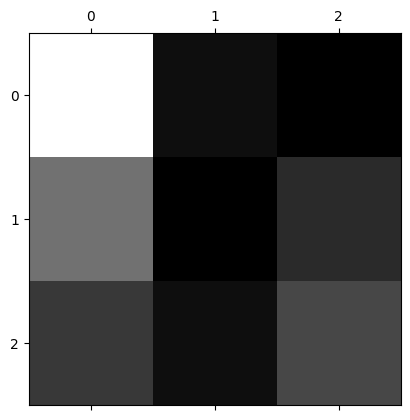

In [11]:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [12]:
probability = log_reg.predict_proba(testX)
probability

print(probability.shape[0])
print(testX.shape[0])

40
40


In [13]:
df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()

,academic,general,vocation
0,0.404201,0.415214,0.180585
1,0.853369,0.089297,0.057334
2,0.699533,0.213888,0.086579
3,0.336764,0.253523,0.409714
4,0.754461,0.216126,0.029413


In [14]:
df['sum'] = df.sum(axis=1)
df.head()

,academic,general,vocation,sum
0,0.404201,0.415214,0.180585,1.000000
1,0.853369,0.089297,0.057334,1.000000
2,0.699533,0.213888,0.086579,1.000000
3,0.336764,0.253523,0.409714,1.000000
4,0.754461,0.216126,0.029413,1.000000


In [15]:
df['predicted_class'] = y_pred
df.head()

,academic,general,vocation,sum,predicted_class
0,0.404201,0.415214,0.180585,1.000000,general
1,0.853369,0.089297,0.057334,1.000000,academic
2,0.699533,0.213888,0.086579,1.000000,academic
3,0.336764,0.253523,0.409714,1.000000,vocation
4,0.754461,0.216126,0.029413,1.000000,academic


In [20]:
# Use statsmodels to assess variables


import statsmodels.api as sm
logit_model = sm.MNLogit(trainY, sm.add_constant(trainX))
logit_model
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
display(stats1)
display(stats2)

Optimization terminated successfully.
         Current function value: 0.776252
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                   prog   No. Observations:                  160
Model:                        MNLogit   Df Residuals:                      138
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.2310
Time:                        11:46:26   Log-Likelihood:                -124.20
converged:                       True   LL-Null:                       -161.50
Covariance Type:            nonrobust   LLR p-value:                 3.171e-08
===================================================================================
  prog=academic       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7530      2.051     -1.829      0.067      -7.774       0.268
female_female      -0.6354      0.505     -1.258      0.208      -1.625       0.354
ses_middle         -0.4461      0.620     -0.720      0.471      -1.660       0.768
ses_high           -0.2427      0.677     -0.358      0.720      -1.570       1.085
schtyp_private      0.6052      0.619      0.978      0.328      -0.607       1.818
honors_enrolled     0.2606      0.751      0.347      0.729      -1.211       1.733
math                0.0869      0.040      2.196      0.028       0.009       0.164
science            -0.0717      0.034     -2.123      0.034      -0.138      -0.005
socst               0.0204      0.031      0.662      0.508      -0.040       0.081
read                0.0344      0.034      1.014      0.310      -0.032       0.101
write               0.0262      0.043      0.609      0.543      -0.058       0.110
-----------------------------------------------------------------------------------
  prog=vocation       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.4634      2.181      2.505      0.012       1.189       9.737
female_female       0.1453      0.605      0.240      0.810      -1.040       1.331
ses_middle          0.8286      0.657      1.261      0.207      -0.459       2.117
ses_high           -0.1806      0.824     -0.219      0.826      -1.795       1.434
schtyp_private     -1.6644      1.154     -1.442      0.149      -3.926       0.597
honors_enrolled     1.0171      0.965      1.054      0.292      -0.874       2.908
math               -0.0692      0.047     -1.468      0.142      -0.161       0.023
science            -0.0114      0.039     -0.291      0.771      -0.088       0.065
socst              -0.0500      0.034     -1.483      0.138      -0.116       0.016
read                0.0448      0.041      1.092      0.275      -0.036       0.125
write              -0.0355      0.047     -0.752      0.452      -0.128       0.057
===================================================================================
"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: MNLogit
=================================================================
Model:              MNLogit          Pseudo R-squared: 0.231     
Dependent Variable: prog             AIC:              292.4006  
Date:               2022-12-07 11:46 BIC:              360.0544  
No. Observations:   160              Log-Likelihood:   -124.20   
Df Model:           20               LL-Null:          -161.50   
Df Residuals:       138              LLR p-value:      3.1707e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
     prog = 0      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
          const   -3.7530   2.0515 -1.8294 0.0673 -7.7738  0.2678
  female_female   -0.6354   0.5049 -1.2584 0.2082 -1.6250  0.3542
     ses_middle   -0.4461   0.6195 -0.7201 0.4715 -1.6603  0.7681
       ses_high   -0.2427   0.6773 -0.3583 0.7201 -1.5702  1.0848
 schtyp_private    0.6052   0.6188  0.9782 0.3280 -0.6075  1.8180
honors_enrolled    0.2606   0.7510  0.3469 0.7286 -1.2114  1.7326
           math    0.0869   0.0396  2.1960 0.0281  0.0093  0.1644
        science   -0.0717   0.0338 -2.1228 0.0338 -0.1379 -0.0055
          socst    0.0204   0.0308  0.6625 0.5077 -0.0400  0.0809
           read    0.0344   0.0339  1.0143 0.3104 -0.0321  0.1008
          write    0.0262   0.0430  0.6090 0.5425 -0.0580  0.1104
-----------------------------------------------------------------
     prog = 1       Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
          const     5.4634   2.1807  2.5054 0.0122  1.1893 9.7374
  female_female     0.1453   0.6049  0.2402 0.8102 -1.0402 1.3308
     ses_middle     0.8286   0.6572  1.2608 0.2074 -0.4595 2.1167
       ses_high    -0.1806   0.8239 -0.2193 0.8264 -1.7954 1.4341
 schtyp_private    -1.6644   1.1538 -1.4425 0.1492 -3.9258 0.5971
honors_enrolled     1.0171   0.9648  1.0542 0.2918 -0.8739 2.9080
           math    -0.0692   0.0471 -1.4680 0.1421 -0.1615 0.0232
        science    -0.0114   0.0390 -0.2910 0.7711 -0.0879 0.0651
          socst    -0.0500   0.0337 -1.4832 0.1380 -0.1160 0.0161
           read     0.0448   0.0411  1.0923 0.2747 -0.0356 0.1253
          write    -0.0355   0.0472 -0.7517 0.4522 -0.1281 0.0571
=================================================================

"""

In [21]:
print(stats1)

                          MNLogit Regression Results                          
Dep. Variable:                   prog   No. Observations:                  160
Model:                        MNLogit   Df Residuals:                      138
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.2310
Time:                        11:46:26   Log-Likelihood:                -124.20
converged:                       True   LL-Null:                       -161.50
Covariance Type:            nonrobust   LLR p-value:                 3.171e-08
  prog=academic       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7530      2.051     -1.829      0.067      -7.774       0.268
female_female      -0.6354      0.505     -1.258      0.208      -1.625       0.354
ses_middle         -0.4461      

In [22]:
print(stats2)

                        Results: MNLogit
Model:              MNLogit          Pseudo R-squared: 0.231     
Dependent Variable: prog             AIC:              292.4006  
Date:               2022-12-07 11:46 BIC:              360.0544  
No. Observations:   160              Log-Likelihood:   -124.20   
Df Model:           20               LL-Null:          -161.50   
Df Residuals:       138              LLR p-value:      3.1707e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
     prog = 0      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
          const   -3.7530   2.0515 -1.8294 0.0673 -7.7738  0.2678
  female_female   -0.6354   0.5049 -1.2584 0.2082 -1.6250  0.3542
     ses_middle   -0.4461   0.6195 -0.7201 0.4715 -1.6603  0.7681
       ses_high   -0.2427   0.6773 